# Práctica 1: Extracción de Entidades

* Curso: Data Science para la Gestión de la Información no Estructurada
* Nombre: Mayra Johana Goicochea Neyra
* Máster en Data Science para Finanzas

## Librerías

In [1]:
import nltk, re, pprint
from nltk.probability import FreqDist

In [2]:
import spacy
from spacy import displacy
import pandas as pd
nlp_en = spacy.load('en_core_web_sm')
nlp_sp = spacy.load('es_core_news_sm')

## Data Loading
Se cargaron dos textos: uno en inglés y otro en español, guardados en archivos txt, a dos variables string: `text_eng` y` text_spa`, mediante la función `open`.

1. Obtenga dos ficheros en formato txt, uno de ellos en ingles y otro
en español, que contengan textos con entidades a extraer. Busque
textos con un conjunto amplio de entidades, no se limite a dos o
tres de cada tipo

In [3]:
text_eng=""
with open("c:/Users/Goicochea/Desktop/CUNEF/Cursos/Text Mining/Prácticas/Reporte ENG.txt", encoding="utf8") as f:
    for line in f:
        text_eng += line
text_eng = text_eng.replace("\n"," ")

In [4]:
text_spa=""
with open("c:/Users/Goicochea/Desktop/CUNEF/Cursos/Text Mining/Prácticas/Reporte SPA.txt", encoding="utf8") as f:
    for line in f:
        text_spa += line
text_spa = text_spa.replace("\n"," ")

La clasificación de textos es una de las tareas importantes del text mining. Antes de desarrollar y entrenar los modelos, se requiere una preparación de los datos. Primero se deben identifican y extraen las entidades de los textos. Para realizar ello hay varias librerías de python, pero las más utilizadas son `NLTK` y `spaCy`.

<img src="http://res.cloudinary.com/dyd911kmh/image/upload/f_auto,q_auto:best/v1535125878/NLTK3_zwbdgg.png">

## Pre-Procesamiento
Esta etapa consiste en las actividades de limpieza y adecuación de la información para proceder con el modelado. Se realizan aquí las actividades de tokenization (tanto la división del texto en frases y luego en palabras), la normalización (para eliminar el ruido) y finalmente en el análisis morfológico (identificación de las entidades y sus clases).

### Mediante las funciones del paquete NLTK
NTLK es un paquete poderoso de Python que provee un conjunto de algoritmos diversos de lenguaje natural. Es gratuito, opensource, fácil de usar y bien documentado. NLTK ayuda al procesador a analizar, pre-procesar y entender el texto.

2. Lea estos textos desde un programa Python, y realice las labores de
pre-procesamiento habituales: división en frases, división en
palabras y conversión a las formas normales. Utilice los frameworks
que prefiera, se sugiere NLTK o spaCy

#### Sentence Tokenization
Esta actividad es el primer paso del análisis de textos. Consiste en descomponer un párrafo de texto en fragmentos más pequeños, como palabras u oraciones.
La función `sent_tokenize` divide el texto en frases u oraciones. A continuación, se realiza la descomposición en oraciones/frases.

In [5]:
# Dividimos en frases
frasesENG = nltk.sent_tokenize(text_eng)
print(frasesENG)

['Spain records highest daily rise in coronavirus deaths with 769 fatalities Government says protective gear is on its way, and insists the food supply chain is guaranteed Madrid - March 27, 2020 - 16:24 elpais.com The latest official figures released by the Spanish Health Ministry on Friday revealed that 769 people have died from the SARS-CoV-2 coronavirus in the last 24 hours – the highest daily rise in fatalities since the beginning of the outbreak.', 'That brings the total number of deaths in the country to 4,858, making it the second highest toll in the world after Italy and ahead of China.', 'A total of 64,059 people have been infected according to official figures, a rise of 14% since Thursday.', 'More than 36,000 people are currently in the hospital, and of these, 4,165 are in intensive care, a day-on-day increase of 13%.', 'Meanwhile 9,357 patients have recovered and have been released from hospital, representing almost twice the number of deaths.', 'Daily rise in coronavirus 

In [6]:
# Dividimos en frases
frasesSPA = nltk.sent_tokenize(text_spa)
print(frasesSPA)

['Mirar al futuro en tiempos del coronavirus.', 'Cuatro claves prácticas El ser humano necesita proyectar sueños.', 'Nada es eterno, y tampoco lo será el confinamiento en nuestras casas Pilar Jericó, elpaís.com (30 de Marzo del 2020 - 17:34) Cuando uno está en un túnel, necesita proyectar sueños hacia el futuro.', 'Divisar la luz que hay al final.', 'Nada es eterno.', 'Tampoco lo va a ser la Covid-19 ni el confinamiento en nuestras casas.', 'Tarde o temprano se reducirá la cifra de contagios, llegará una vacuna y un tratamiento que nos cure.', 'Mientras sucede, tenemos que pasar este tiempo de la mejor forma posible, a pesar de las circunstancias que nos haya tocado vivir.', 'En el libro NoMiedo expliqué que, en la mitología romana, el miedo es hijo de Venus, la diosa del amor.', 'Esta tradición recoge, en formato metafórico, las vivencias del ser humano.', 'Es ella la que nos descubre que el miedo y el amor (o mejor dicho, el apego) están relacionados.', 'El miedo surge cuando tememos

#### Word Tokenization
Continuando con la descomposición del párrafo en palabras.

In [7]:
# Dividimos en palabras
wdENG_token = [nltk.word_tokenize(frase) for frase in frasesENG]
print(wdENG_token)

[['Spain', 'records', 'highest', 'daily', 'rise', 'in', 'coronavirus', 'deaths', 'with', '769', 'fatalities', 'Government', 'says', 'protective', 'gear', 'is', 'on', 'its', 'way', ',', 'and', 'insists', 'the', 'food', 'supply', 'chain', 'is', 'guaranteed', 'Madrid', '-', 'March', '27', ',', '2020', '-', '16:24', 'elpais.com', 'The', 'latest', 'official', 'figures', 'released', 'by', 'the', 'Spanish', 'Health', 'Ministry', 'on', 'Friday', 'revealed', 'that', '769', 'people', 'have', 'died', 'from', 'the', 'SARS-CoV-2', 'coronavirus', 'in', 'the', 'last', '24', 'hours', '–', 'the', 'highest', 'daily', 'rise', 'in', 'fatalities', 'since', 'the', 'beginning', 'of', 'the', 'outbreak', '.'], ['That', 'brings', 'the', 'total', 'number', 'of', 'deaths', 'in', 'the', 'country', 'to', '4,858', ',', 'making', 'it', 'the', 'second', 'highest', 'toll', 'in', 'the', 'world', 'after', 'Italy', 'and', 'ahead', 'of', 'China', '.'], ['A', 'total', 'of', '64,059', 'people', 'have', 'been', 'infected', 'a

Cabe indicar que solo se separa en palabras, por lo que los simbolos de puntuación se mantiene, y en muchos párrafos la incidencia de estos es mayor que las palabras.  
Por ello se adjunta un gráfico que muestra la frecuencia de estos objetos, y se observa que en el caso del texto en inglés, la comma `,` es uno de los elementos más frecuentes, en cambio el texto en Español, son el punto `.` y la comma `,`.

In [8]:
wdENG_token_ =nltk.word_tokenize(text_eng)
fdistENG = FreqDist(wdENG_token_)
fdistENG.most_common(2)

[('the', 49), (',', 37)]

In [9]:
# Frequency Distribution Plot
import matplotlib.pyplot as plt
fdistENG.plot(30,cumulative=False)
plt.show();

<Figure size 640x480 with 1 Axes>

In [10]:
# Dividimos en palabras
wdSPA_token = [nltk.word_tokenize(frase) for frase in frasesSPA]
print(wdSPA_token)

[['Mirar', 'al', 'futuro', 'en', 'tiempos', 'del', 'coronavirus', '.'], ['Cuatro', 'claves', 'prácticas', 'El', 'ser', 'humano', 'necesita', 'proyectar', 'sueños', '.'], ['Nada', 'es', 'eterno', ',', 'y', 'tampoco', 'lo', 'será', 'el', 'confinamiento', 'en', 'nuestras', 'casas', 'Pilar', 'Jericó', ',', 'elpaís.com', '(', '30', 'de', 'Marzo', 'del', '2020', '-', '17:34', ')', 'Cuando', 'uno', 'está', 'en', 'un', 'túnel', ',', 'necesita', 'proyectar', 'sueños', 'hacia', 'el', 'futuro', '.'], ['Divisar', 'la', 'luz', 'que', 'hay', 'al', 'final', '.'], ['Nada', 'es', 'eterno', '.'], ['Tampoco', 'lo', 'va', 'a', 'ser', 'la', 'Covid-19', 'ni', 'el', 'confinamiento', 'en', 'nuestras', 'casas', '.'], ['Tarde', 'o', 'temprano', 'se', 'reducirá', 'la', 'cifra', 'de', 'contagios', ',', 'llegará', 'una', 'vacuna', 'y', 'un', 'tratamiento', 'que', 'nos', 'cure', '.'], ['Mientras', 'sucede', ',', 'tenemos', 'que', 'pasar', 'este', 'tiempo', 'de', 'la', 'mejor', 'forma', 'posible', ',', 'a', 'pesar',

In [11]:
wdSPA_token_=nltk.word_tokenize(text_spa)
fdistSPA = FreqDist(wdSPA_token_)
fdistSPA.most_common(2)

[('.', 59), (',', 55)]

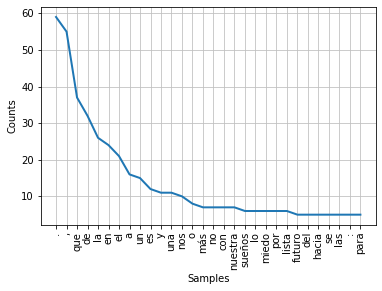

In [12]:
# Frequency Distribution Plot
import matplotlib.pyplot as plt
fdistSPA.plot(30,cumulative=False)
plt.show();

#### Eliminando Stop-words
Los stopwords son considerados con ruido en el texto. Algunos stop-word son preposiciones, artículos, etc que no guardan información importante en ellos. NLTK tiene una lista de stopwords y con esta lista se puede diferenciar los datos que se tienen en el párrafo.
Sin embargo, este metodo tal vez no es el más óptimo si consideramos que le quita información en el caso de los textos inglés a los phrasal-verbs que contienen preposiciones.

In [13]:
from nltk.corpus import stopwords
stop_wdENG=set(stopwords.words("english"))
stop_wdENG

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

In [14]:
filt_sENG=[]
for w in wdENG_token_:
    if w not in stop_wdENG:
        filt_sENG.append(w)
#print("Tokenized Sentence:",wdENG_token)
print("Filterd Sentence:",filt_sENG)

Filterd Sentence: ['Spain', 'records', 'highest', 'daily', 'rise', 'coronavirus', 'deaths', '769', 'fatalities', 'Government', 'says', 'protective', 'gear', 'way', ',', 'insists', 'food', 'supply', 'chain', 'guaranteed', 'Madrid', '-', 'March', '27', ',', '2020', '-', '16:24', 'elpais.com', 'The', 'latest', 'official', 'figures', 'released', 'Spanish', 'Health', 'Ministry', 'Friday', 'revealed', '769', 'people', 'died', 'SARS-CoV-2', 'coronavirus', 'last', '24', 'hours', '–', 'highest', 'daily', 'rise', 'fatalities', 'since', 'beginning', 'outbreak', '.', 'That', 'brings', 'total', 'number', 'deaths', 'country', '4,858', ',', 'making', 'second', 'highest', 'toll', 'world', 'Italy', 'ahead', 'China', '.', 'A', 'total', '64,059', 'people', 'infected', 'according', 'official', 'figures', ',', 'rise', '14', '%', 'since', 'Thursday', '.', 'More', '36,000', 'people', 'currently', 'hospital', ',', ',', '4,165', 'intensive', 'care', ',', 'day-on-day', 'increase', '13', '%', '.', 'Meanwhile', '

In [15]:
stop_wdSPA=set(stopwords.words("spanish"))
stop_wdSPA

{'a',
 'al',
 'algo',
 'algunas',
 'algunos',
 'ante',
 'antes',
 'como',
 'con',
 'contra',
 'cual',
 'cuando',
 'de',
 'del',
 'desde',
 'donde',
 'durante',
 'e',
 'el',
 'ella',
 'ellas',
 'ellos',
 'en',
 'entre',
 'era',
 'erais',
 'eran',
 'eras',
 'eres',
 'es',
 'esa',
 'esas',
 'ese',
 'eso',
 'esos',
 'esta',
 'estaba',
 'estabais',
 'estaban',
 'estabas',
 'estad',
 'estada',
 'estadas',
 'estado',
 'estados',
 'estamos',
 'estando',
 'estar',
 'estaremos',
 'estará',
 'estarán',
 'estarás',
 'estaré',
 'estaréis',
 'estaría',
 'estaríais',
 'estaríamos',
 'estarían',
 'estarías',
 'estas',
 'este',
 'estemos',
 'esto',
 'estos',
 'estoy',
 'estuve',
 'estuviera',
 'estuvierais',
 'estuvieran',
 'estuvieras',
 'estuvieron',
 'estuviese',
 'estuvieseis',
 'estuviesen',
 'estuvieses',
 'estuvimos',
 'estuviste',
 'estuvisteis',
 'estuviéramos',
 'estuviésemos',
 'estuvo',
 'está',
 'estábamos',
 'estáis',
 'están',
 'estás',
 'esté',
 'estéis',
 'estén',
 'estés',
 'fue',
 'f

In [16]:
filt_sSPA=[]
for w in wdSPA_token_:
    if w not in stop_wdSPA:
        filt_sSPA.append(w)
#print("Tokenized Sentence:",wdSPA_token)
print("Filterd Sentence:",filt_sSPA)

Filterd Sentence: ['Mirar', 'futuro', 'tiempos', 'coronavirus', '.', 'Cuatro', 'claves', 'prácticas', 'El', 'ser', 'humano', 'necesita', 'proyectar', 'sueños', '.', 'Nada', 'eterno', ',', 'tampoco', 'confinamiento', 'casas', 'Pilar', 'Jericó', ',', 'elpaís.com', '(', '30', 'Marzo', '2020', '-', '17:34', ')', 'Cuando', 'túnel', ',', 'necesita', 'proyectar', 'sueños', 'hacia', 'futuro', '.', 'Divisar', 'luz', 'final', '.', 'Nada', 'eterno', '.', 'Tampoco', 'va', 'ser', 'Covid-19', 'confinamiento', 'casas', '.', 'Tarde', 'temprano', 'reducirá', 'cifra', 'contagios', ',', 'llegará', 'vacuna', 'tratamiento', 'cure', '.', 'Mientras', 'sucede', ',', 'pasar', 'tiempo', 'mejor', 'forma', 'posible', ',', 'pesar', 'circunstancias', 'tocado', 'vivir', '.', 'En', 'libro', 'NoMiedo', 'expliqué', ',', 'mitología', 'romana', ',', 'miedo', 'hijo', 'Venus', ',', 'diosa', 'amor', '.', 'Esta', 'tradición', 'recoge', ',', 'formato', 'metafórico', ',', 'vivencias', 'ser', 'humano', '.', 'Es', 'descubre', 'm

#### Normalización Lexicon
La normalización lexicon considera otro tipo de ruido, donde se agrupan las palabras según su palabra origen. Por ejemplo: "Conexión", "Conectados", "Conectandose", etc. en la palabra "Conectar".

##### Stemming
Es un proceso de normalización linguistica, que reduce las palabras en su palabra raíz o corta los afijos derivados.

In [17]:
from nltk.stem import PorterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize

ps = PorterStemmer()

stem_wENG=[]
for w in filt_sENG:
    stem_wENG.append(ps.stem(w))

#print("Filtered Sentence:",filt_sENG)
print("Stemmed Sentence:",stem_wENG)

Stemmed Sentence: ['spain', 'record', 'highest', 'daili', 'rise', 'coronaviru', 'death', '769', 'fatal', 'govern', 'say', 'protect', 'gear', 'way', ',', 'insist', 'food', 'suppli', 'chain', 'guarante', 'madrid', '-', 'march', '27', ',', '2020', '-', '16:24', 'elpais.com', 'the', 'latest', 'offici', 'figur', 'releas', 'spanish', 'health', 'ministri', 'friday', 'reveal', '769', 'peopl', 'die', 'sars-cov-2', 'coronaviru', 'last', '24', 'hour', '–', 'highest', 'daili', 'rise', 'fatal', 'sinc', 'begin', 'outbreak', '.', 'that', 'bring', 'total', 'number', 'death', 'countri', '4,858', ',', 'make', 'second', 'highest', 'toll', 'world', 'itali', 'ahead', 'china', '.', 'A', 'total', '64,059', 'peopl', 'infect', 'accord', 'offici', 'figur', ',', 'rise', '14', '%', 'sinc', 'thursday', '.', 'more', '36,000', 'peopl', 'current', 'hospit', ',', ',', '4,165', 'intens', 'care', ',', 'day-on-day', 'increas', '13', '%', '.', 'meanwhil', '9,357', 'patient', 'recov', 'releas', 'hospit', ',', 'repres', 'al

In [18]:
fdist_stemENG = FreqDist(stem_wENG)
fdist_stemENG.most_common(2)

[(',', 37), ('.', 22)]

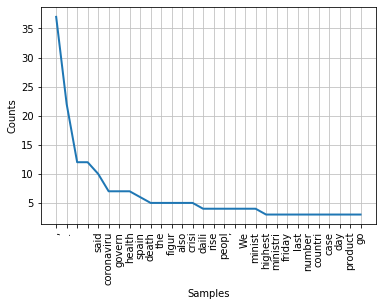

In [19]:
fdist_stemENG.plot(30,cumulative=False)
plt.show();

In [20]:
from nltk.stem.snowball import SnowballStemmer
ss = SnowballStemmer('spanish')

stem_wSPA=[]
for w in filt_sSPA:
    stem_wSPA.append(ss.stem(w))

#print("Filtered Sentence:",filt_sSPA)
print("Stemmed Sentence:",stem_wSPA)

Stemmed Sentence: ['mir', 'futur', 'tiemp', 'coronavirus', '.', 'cuatr', 'clav', 'practic', 'el', 'ser', 'human', 'necesit', 'proyect', 'sueñ', '.', 'nad', 'etern', ',', 'tampoc', 'confin', 'cas', 'pil', 'jeric', ',', 'elpais.com', '(', '30', 'marz', '2020', '-', '17:34', ')', 'cuand', 'tunel', ',', 'necesit', 'proyect', 'sueñ', 'haci', 'futur', '.', 'divis', 'luz', 'final', '.', 'nad', 'etern', '.', 'tampoc', 'va', 'ser', 'covid-19', 'confin', 'cas', '.', 'tard', 'tempran', 'reduc', 'cifr', 'contagi', ',', 'lleg', 'vacun', 'tratamient', 'cur', '.', 'mientr', 'suced', ',', 'pas', 'tiemp', 'mejor', 'form', 'posibl', ',', 'pes', 'circunst', 'toc', 'viv', '.', 'en', 'libr', 'nomied', 'expliqu', ',', 'mitolog', 'roman', ',', 'mied', 'hij', 'venus', ',', 'dios', 'amor', '.', 'esta', 'tradicion', 'recog', ',', 'format', 'metafor', ',', 'vivenci', 'ser', 'human', '.', 'es', 'descubr', 'mied', 'amor', '(', 'mejor', 'dich', ',', 'apeg', ')', 'relacion', '.', 'el', 'mied', 'surg', 'tem', 'perd',

In [21]:
fdist_stemSPA = FreqDist(stem_wSPA)
fdist_stemSPA.most_common(2)

[('.', 59), (',', 55)]

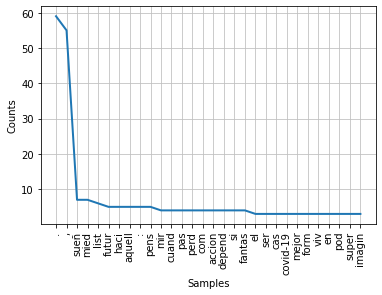

In [22]:
fdist_stemSPA.plot(30,cumulative=False)
plt.show();

##### Lemmatization
Transforma la raíz de la palabra con el uso de vocabulario y análisis morfológicos. La lematización suele ser más sofisticada que la derivación. 

In [23]:
from nltk.stem.wordnet import WordNetLemmatizer
lem = WordNetLemmatizer()

lem_wENG=[]
for w in filt_sENG:
    lem_wENG.append(lem.lemmatize(w,"v"))

print("Lemmatized Word:",lem_wENG)

Lemmatized Word: ['Spain', 'record', 'highest', 'daily', 'rise', 'coronavirus', 'deaths', '769', 'fatalities', 'Government', 'say', 'protective', 'gear', 'way', ',', 'insist', 'food', 'supply', 'chain', 'guarantee', 'Madrid', '-', 'March', '27', ',', '2020', '-', '16:24', 'elpais.com', 'The', 'latest', 'official', 'figure', 'release', 'Spanish', 'Health', 'Ministry', 'Friday', 'reveal', '769', 'people', 'die', 'SARS-CoV-2', 'coronavirus', 'last', '24', 'hours', '–', 'highest', 'daily', 'rise', 'fatalities', 'since', 'begin', 'outbreak', '.', 'That', 'bring', 'total', 'number', 'deaths', 'country', '4,858', ',', 'make', 'second', 'highest', 'toll', 'world', 'Italy', 'ahead', 'China', '.', 'A', 'total', '64,059', 'people', 'infect', 'accord', 'official', 'figure', ',', 'rise', '14', '%', 'since', 'Thursday', '.', 'More', '36,000', 'people', 'currently', 'hospital', ',', ',', '4,165', 'intensive', 'care', ',', 'day-on-day', 'increase', '13', '%', '.', 'Meanwhile', '9,357', 'patients', 're

In [24]:
fdist_lemENG = FreqDist(lem_wENG)
fdist_lemENG.most_common(2)

[(',', 37), ('.', 22)]

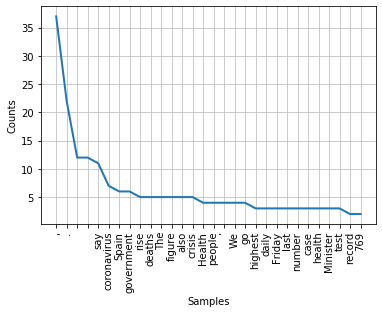

In [25]:
fdist_lemENG.plot(30,cumulative=False)
plt.show();

In [26]:
#Lexicon Normalization
#performing stemming and Lemmatization

lem_wSPA=[]
for w in filt_sSPA:
    lem_wSPA.append(lem.lemmatize(w,"v"))

print("Lemmatized Word:",lem_wSPA)

Lemmatized Word: ['Mirar', 'futuro', 'tiempos', 'coronavirus', '.', 'Cuatro', 'claves', 'prácticas', 'El', 'ser', 'humano', 'necesita', 'proyectar', 'sueños', '.', 'Nada', 'eterno', ',', 'tampoco', 'confinamiento', 'casas', 'Pilar', 'Jericó', ',', 'elpaís.com', '(', '30', 'Marzo', '2020', '-', '17:34', ')', 'Cuando', 'túnel', ',', 'necesita', 'proyectar', 'sueños', 'hacia', 'futuro', '.', 'Divisar', 'luz', 'final', '.', 'Nada', 'eterno', '.', 'Tampoco', 'va', 'ser', 'Covid-19', 'confinamiento', 'casas', '.', 'Tarde', 'temprano', 'reducirá', 'cifra', 'contagios', ',', 'llegará', 'vacuna', 'tratamiento', 'cure', '.', 'Mientras', 'sucede', ',', 'pasar', 'tiempo', 'mejor', 'forma', 'posible', ',', 'pesar', 'circunstancias', 'tocado', 'vivir', '.', 'En', 'libro', 'NoMiedo', 'expliqué', ',', 'mitología', 'romana', ',', 'miedo', 'hijo', 'Venus', ',', 'diosa', 'amor', '.', 'Esta', 'tradición', 'recoge', ',', 'formato', 'metafórico', ',', 'vivencias', 'ser', 'humano', '.', 'Es', 'descubre', 'mi

In [27]:
fdist_lemSPA = FreqDist(lem_wSPA)
fdist_lemSPA.most_common(2)

[('.', 59), (',', 55)]

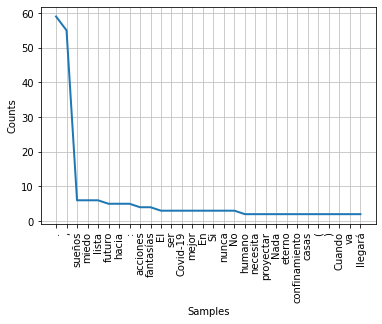

In [28]:
fdist_lemSPA.plot(30,cumulative=False)
plt.show();

#### Análisis Morfológico


El siguiente paso con la librería NLTK, es realizar el análisis morfológico para ello se utiliza la función `pos_tag`.
El objetivo principal del etiquetado POS(Part-of-Speech) es identificar el grupo gramatical de una palabra determinada. Ya sea un sustantivo, pronombre, adjetivo, verbo, publicidad entre otras, según el contexto. El etiquetado POS busca relaciones dentro de la oración y asigna una etiqueta correspondiente a la palabra.

In [29]:
# Análisis morfológico
frENG_tagged = [nltk.pos_tag(frase) for frase in wdENG_token]
print(frENG_tagged)

[[('Spain', 'NNP'), ('records', 'NNS'), ('highest', 'JJS'), ('daily', 'JJ'), ('rise', 'NN'), ('in', 'IN'), ('coronavirus', 'JJ'), ('deaths', 'NNS'), ('with', 'IN'), ('769', 'CD'), ('fatalities', 'NNS'), ('Government', 'NNP'), ('says', 'VBZ'), ('protective', 'JJ'), ('gear', 'NN'), ('is', 'VBZ'), ('on', 'IN'), ('its', 'PRP$'), ('way', 'NN'), (',', ','), ('and', 'CC'), ('insists', 'VBZ'), ('the', 'DT'), ('food', 'NN'), ('supply', 'NN'), ('chain', 'NN'), ('is', 'VBZ'), ('guaranteed', 'VBN'), ('Madrid', 'NNP'), ('-', ':'), ('March', 'NNP'), ('27', 'CD'), (',', ','), ('2020', 'CD'), ('-', ':'), ('16:24', 'CD'), ('elpais.com', 'IN'), ('The', 'DT'), ('latest', 'JJS'), ('official', 'JJ'), ('figures', 'NNS'), ('released', 'VBN'), ('by', 'IN'), ('the', 'DT'), ('Spanish', 'JJ'), ('Health', 'NNP'), ('Ministry', 'NNP'), ('on', 'IN'), ('Friday', 'NNP'), ('revealed', 'VBD'), ('that', 'IN'), ('769', 'CD'), ('people', 'NNS'), ('have', 'VBP'), ('died', 'VBN'), ('from', 'IN'), ('the', 'DT'), ('SARS-CoV-2'

In [30]:
# Análisis morfológico
frSPA_tagged = [nltk.pos_tag(frase) for frase in wdSPA_token]
print(frSPA_tagged)

[[('Mirar', 'NNP'), ('al', 'NN'), ('futuro', 'NN'), ('en', 'IN'), ('tiempos', 'JJ'), ('del', 'NN'), ('coronavirus', 'NN'), ('.', '.')], [('Cuatro', 'NNP'), ('claves', 'VBZ'), ('prácticas', 'JJ'), ('El', 'NNP'), ('ser', 'NN'), ('humano', 'NN'), ('necesita', 'JJ'), ('proyectar', 'NN'), ('sueños', 'NN'), ('.', '.')], [('Nada', 'NNP'), ('es', 'NN'), ('eterno', 'NN'), (',', ','), ('y', 'CC'), ('tampoco', 'NN'), ('lo', 'NN'), ('será', 'NN'), ('el', 'NN'), ('confinamiento', 'NN'), ('en', 'FW'), ('nuestras', 'FW'), ('casas', 'NNS'), ('Pilar', 'NNP'), ('Jericó', 'NNP'), (',', ','), ('elpaís.com', 'NN'), ('(', '('), ('30', 'CD'), ('de', 'IN'), ('Marzo', 'NNP'), ('del', 'FW'), ('2020', 'CD'), ('-', ':'), ('17:34', 'CD'), (')', ')'), ('Cuando', 'NNP'), ('uno', 'JJ'), ('está', 'NN'), ('en', 'IN'), ('un', 'JJ'), ('túnel', 'NN'), (',', ','), ('necesita', 'JJ'), ('proyectar', 'NN'), ('sueños', 'NN'), ('hacia', 'NN'), ('el', 'NN'), ('futuro', 'NN'), ('.', '.')], [('Divisar', 'NNP'), ('la', 'NN'), ('luz

#### Extracción de Entidades
La función `ne_chunk` muestra la lista ordenada de elementos por cada oración del texto, donde también presenta la entidad reconocida del elemento.

In [31]:
# Extracción de entidades
for fras in frENG_tagged:
    print(nltk.ne_chunk(fras))

(S
  (GPE Spain/NNP)
  records/NNS
  highest/JJS
  daily/JJ
  rise/NN
  in/IN
  coronavirus/JJ
  deaths/NNS
  with/IN
  769/CD
  fatalities/NNS
  Government/NNP
  says/VBZ
  protective/JJ
  gear/NN
  is/VBZ
  on/IN
  its/PRP$
  way/NN
  ,/,
  and/CC
  insists/VBZ
  the/DT
  food/NN
  supply/NN
  chain/NN
  is/VBZ
  guaranteed/VBN
  (GPE Madrid/NNP)
  -/:
  March/NNP
  27/CD
  ,/,
  2020/CD
  -/:
  16:24/CD
  elpais.com/IN
  The/DT
  latest/JJS
  official/JJ
  figures/NNS
  released/VBN
  by/IN
  the/DT
  (ORGANIZATION Spanish/JJ Health/NNP Ministry/NNP)
  on/IN
  Friday/NNP
  revealed/VBD
  that/IN
  769/CD
  people/NNS
  have/VBP
  died/VBN
  from/IN
  the/DT
  SARS-CoV-2/NNP
  coronavirus/NN
  in/IN
  the/DT
  last/JJ
  24/CD
  hours/NNS
  –/VBP
  the/DT
  highest/JJS
  daily/JJ
  rise/NN
  in/IN
  fatalities/NNS
  since/IN
  the/DT
  beginning/NN
  of/IN
  the/DT
  outbreak/NN
  ./.)
(S
  That/DT
  brings/VBZ
  the/DT
  total/JJ
  number/NN
  of/IN
  deaths/NNS
  in/IN
  the/DT
  co

  ./.)
(S
  “/IN
  We/PRP
  know/VBP
  they/PRP
  are/VBP
  life-altering./JJ
  ”/NNP
  (PERSON Montero/NNP)
  also/RB
  underscored/VBD
  that/IN
  supermarkets/NNS
  in/IN
  (GPE Spain/NNP)
  remain/VBP
  well/RB
  stocked/VBN
  and/CC
  that/IN
  the/DT
  supply/NN
  chain/NN
  is/VBZ
  guaranteed/VBN
  ./.)
(S
  “/NN
  Spaniards/NNS
  have/VBP
  nothing/NN
  to/TO
  fear/VB
  because/IN
  they/PRP
  are/VBP
  going/VBG
  to/TO
  find/VB
  products/NNS
  at/IN
  the/DT
  supermarket/NN
  ./.
  ”/NN)


In [32]:
# Extracción de entidades
for fras in frSPA_tagged:
    print(nltk.ne_chunk(fras))

(S
  (GPE Mirar/NNP)
  al/NN
  futuro/NN
  en/IN
  tiempos/JJ
  del/NN
  coronavirus/NN
  ./.)
(S
  (GPE Cuatro/NNP)
  claves/VBZ
  prácticas/JJ
  El/NNP
  ser/NN
  humano/NN
  necesita/JJ
  proyectar/NN
  sueños/NN
  ./.)
(S
  (GPE Nada/NNP)
  es/NN
  eterno/NN
  ,/,
  y/CC
  tampoco/NN
  lo/NN
  será/NN
  el/NN
  confinamiento/NN
  en/FW
  nuestras/FW
  casas/NNS
  (PERSON Pilar/NNP Jericó/NNP)
  ,/,
  elpaís.com/NN
  (/(
  30/CD
  de/IN
  (PERSON Marzo/NNP)
  del/FW
  2020/CD
  -/:
  17:34/CD
  )/)
  (PERSON Cuando/NNP)
  uno/JJ
  está/NN
  en/IN
  un/JJ
  túnel/NN
  ,/,
  necesita/JJ
  proyectar/NN
  sueños/NN
  hacia/NN
  el/NN
  futuro/NN
  ./.)
(S (GPE Divisar/NNP) la/NN luz/NN que/NN hay/NN al/IN final/JJ ./.)
(S (GPE Nada/NNP) es/NN eterno/NN ./.)
(S
  (GPE Tampoco/NNP)
  lo/VBZ
  va/FW
  a/DT
  ser/NN
  la/NN
  Covid-19/NNP
  ni/NN
  el/NN
  confinamiento/NN
  en/FW
  nuestras/FW
  casas/NN
  ./.)
(S
  (GPE Tarde/NNP)
  o/MD
  temprano/VB
  se/JJ
  reducirá/NN
  la/NN
  cifra

  ./.)
(S
  (GPE Sin/NNP)
  embargo/NN
  ,/,
  las/JJ
  que/NN
  nos/JJ
  llenarán/NN
  de/IN
  vigor/FW
  serán/JJ
  aquellas/NNS
  que/VBP
  van/JJ
  aparejadas/IN
  a/DT
  un/JJ
  fin/NN
  concreto/NN
  ,/,
  como/NN
  celebrar/NN
  la/NN
  amistad/JJ
  con/NN
  una/JJ
  fiesta/NN
  ./.)
(S
  (GPE Si/NNP)
  hay/NN
  un/JJ
  motivo/NN
  que/NN
  nos/JJ
  trasciende/NN
  ,/,
  se/FW
  convierte/NN
  en/IN
  poderoso/NN
  ./.)
(S
  O/NNP
  como/NN
  resumía/NN
  (PERSON Nietzsche/NNP)
  :/:
  “/JJ
  Quien/NNP
  tiene/NN
  un/JJ
  porqué/NN
  para/NN
  vivir/NN
  puede/NN
  soportar/NN
  cualquier/NN
  cómo/NN
  ”/NN
  ./.)
(S 4/CD ./.)
(S No/DT definamos/NN una/JJ fecha/NN concreta/NN ./.)
(S
  (GPE Aunque/NNP)
  sepamos/NN
  que/NN
  todo/NN
  esto/NN
  va/IN
  a/DT
  pasar/NN
  ,/,
  no/DT
  conocemos/NN
  con/NN
  precisión/NN
  cuándo/NN
  ,/,
  ni/JJ
  debemos/NN
  someter/NN
  nuestra/JJ
  lista/VBZ
  a/DT
  una/JJ
  fecha/NN
  concreta/NN
  ./.)
(S
  (PERSON Durante/NNP)
  la/NN

### Mediante las funciones del paquete SPACY
spaCy es una librería gratuita de código abierto para el procesamiento avanzado de lenguaje natural (PNL) en Python. Está diseñado específicamente para uso en producción y le ayuda a crear aplicaciones que procesan y "entienden" grandes volúmenes de texto.
Primero se importan los modelos estadísticos, en este caso se descargan y se importan `en_core_web_sm` para el texto en inglés y `es_core_news_sm` para el texto en español.
##### Procesando el texto
Procesar texto en spaCy se realiza mediante el objeto `nlp` que retorna un objeto `doc` que guarda toda la información sobre los tokens, las características linguisticas y sus relaciones.

In [33]:
doc_eng = nlp_en(text_eng)

In [34]:
doc_spa = nlp_sp(text_spa)

La función `sents` del objeto `doc` separa el texto en oraciones o frases, similar a `sent_tokenize` de la librería NLTK.

In [35]:
# Imprimimos frases
for sent in doc_eng.sents:
    print(sent.text)

Spain records highest daily rise in coronavirus deaths with 769 fatalities
Government says protective gear is on its way, and insists the food supply chain is guaranteed Madrid - March 27, 2020 - 16:24 elpais.com
The latest official figures released by the Spanish Health Ministry on Friday revealed that 769 people have died from the SARS-CoV-2 coronavirus in the last 24 hours – the highest daily rise in fatalities since the beginning of the outbreak.
That brings the total number of deaths in the country to 4,858, making it the second highest toll in the world after Italy and ahead of China.
A total of 64,059 people have been infected according to official figures, a rise of 14% since Thursday.
More than 36,000 people are currently in the hospital, and of these, 4,165 are in intensive care, a day-on-day increase of 13%.
Meanwhile 9,357 patients have recovered and have been released from hospital, representing almost twice the number of deaths.
Daily rise in coronavirus deaths and confir

In [36]:
# Imprimimos frases
for sent in doc_spa.sents:
    print(sent.text)

Mirar al futuro en tiempos del coronavirus.
Cuatro claves prácticas
El ser humano necesita proyectar sueños.
Nada es eterno, y tampoco lo será el confinamiento en nuestras casas Pilar Jericó, elpaís.com (30 de Marzo del 2020 - 17:34) Cuando uno está en un túnel, necesita proyectar sueños hacia el futuro.
Divisar la luz que hay al final.
Nada es eterno.
Tampoco lo va a ser la Covid-19 ni el confinamiento en nuestras casas.
Tarde o temprano se reducirá la cifra de contagios, llegará una vacuna y un tratamiento que nos cure.
Mientras sucede, tenemos que pasar este tiempo de la mejor forma posible, a pesar de las circunstancias que nos haya tocado vivir.
En el libro NoMiedo expliqué que, en la mitología romana, el miedo es hijo de Venus, la diosa del amor.
Esta tradición recoge, en formato metafórico, las vivencias del ser humano.
Es ella la que nos descubre que el miedo y el amor (o mejor dicho, el apego) están relacionados.
El miedo surge cuando tememos perder aquello que tenemos y aprec

El objeto `doc` puede ser descompuesto en palabras o tokens, mediante la función `text` del objeto `doc`, en formas canónicas o lemmas, a través de la función `lemma` de `doc`, y en entidades reconocidas mediante la función `pos_`.
Las entidades reconocidas significa la clase de palabra, por ejemplo: verbo, adjectivo, sustantivo, etc.
A continuación se muestra en forma de tablas, las palabras, su forma canónica y su entidad de los textos en inglés y español.

In [37]:
# Imprimimos tokens, formas canónicas y entidades reconocidas
# POS tagging with Spacy 
spacy_EN_tagged = [(palabra.text, palabra.lemma_, palabra.pos_) for palabra in doc_eng]
pd.DataFrame(spacy_EN_tagged, columns=['Palabra', 'F. Canónica', 'POS']).T

,0,1,2,3,4,5,6,7,8,9,...,787,788,789,790,791,792,793,794,795,796
Palabra,Spain,records,highest,daily,rise,in,coronavirus,deaths,with,769,...,are,going,to,find,products,at,the,supermarket,.,”
F. Canónica,Spain,record,high,daily,rise,in,coronavirus,death,with,769,...,be,go,to,find,product,at,the,supermarket,.,""""
POS,PROPN,VERB,ADJ,ADJ,NOUN,ADP,PROPN,NOUN,ADP,NUM,...,AUX,VERB,PART,VERB,NOUN,ADP,DET,NOUN,PUNCT,PUNCT


In [38]:
# Imprimimos tokens, formas canónicas y entidades reconocidas
# POS tagging with Spacy 
spacy_SP_tagged = [(palabra.text, palabra.lemma_, palabra.pos_) for palabra in doc_spa]
pd.DataFrame(spacy_SP_tagged, columns=['Palabra', 'F. Canónica', 'POS']).T

,0,1,2,3,4,5,6,7,8,9,...,944,945,946,947,948,949,950,951,952,953
Palabra,Mirar,al,futuro,en,tiempos,del,coronavirus,.,Cuatro,claves,...,nuestro,miedo,depende,de,confiar,y,mirar,hacia,adelante,.
F. Canónica,Mirar,al,futuro,en,tiempo,del,coronavirus,.,Cuatro,clave,...,nuestro,miedo,depender,de,confiar,y,mirar,hacia,adelantar,.
POS,VERB,ADP,NOUN,ADP,NOUN,ADP,NOUN,PUNCT,NUM,NOUN,...,DET,NOUN,VERB,ADP,VERB,CONJ,VERB,ADP,ADV,PUNCT


#### Análisis Morfológico
La función `ents` descompone el texto en objetos *entidades*, que tiene atributos como `text` y `label_`. A continuación se muestra los objetos y los atributos en formatos tablas.

In [39]:
# Imprimimos entidades
ent_eng_tagged = [(ent.text, ent.label_) for ent in doc_eng.ents]
pd.DataFrame(ent_eng_tagged, columns=['Entidad', 'Tipo']).T

,0,1,2,3,4,5,6,7,8,9,...,45,46,47,48,49,50,51,52,53,54
Entidad,Spain,daily,769,Madrid,the Spanish Health Ministry,Friday,769,the last 24 hours,daily,"4,858",...,Spain,one,Seven million,today,€578 million,María Jesus Montero,March 14,Montero,Spain,Spaniards
Tipo,GPE,DATE,CARDINAL,GPE,ORG,DATE,CARDINAL,TIME,DATE,CARDINAL,...,GPE,CARDINAL,CARDINAL,DATE,MONEY,PERSON,DATE,PERSON,GPE,NORP


In [40]:
# Imprimimos entidades
ent_spa_tagged = [(ent.text, ent.label_) for ent in doc_spa.ents]
pd.DataFrame(ent_spa_tagged, columns=['Entidad', 'Tipo']).T

,0,1,2,3,4,5,6,7,8,9,...,49,50,51,52,53,54,55,56,57,58
Entidad,Cuatro claves prácticas,El ser humano,Nada es eterno,Pilar Jericó,Divisar,Nada es eterno,Tampoco lo va a ser la Covid-19,Tarde,Mientras sucede,En el libro NoMiedo expliqué,...,“Quien,No definamos,Durante la Navidad,Auschwitz,No,Las bajas,Cuando,Evidentemente,Ya vendrá,Desmontar nuestro miedo
Tipo,MISC,MISC,MISC,PER,PER,MISC,MISC,MISC,MISC,MISC,...,PER,MISC,MISC,LOC,PER,MISC,MISC,MISC,MISC,MISC


#### Extracción de Entidades
La función `displacy/render` muestra las entidades de forma visual, donde resalta y coloca al lado derecho la entidad reconocida.

In [41]:
# Entidades en el texto
for sent in doc_eng.sents:
    displacy.render(sent, style='ent', jupyter=True, options={'distance': 110,'arrow_stroke': 2,'arrow_width': 8})

C:\ProgramData\Anaconda3\lib\runpy.py:193: UserWarning: [W006] No entities to visualize found in Doc object. If this is surprising to you, make sure the Doc was processed using a model that supports named entity recognition, and check the `doc.ents` property manually if necessary.
  "__main__", mod_spec)


C:\ProgramData\Anaconda3\lib\runpy.py:193: UserWarning: [W006] No entities to visualize found in Doc object. If this is surprising to you, make sure the Doc was processed using a model that supports named entity recognition, and check the `doc.ents` property manually if necessary.
  "__main__", mod_spec)


C:\ProgramData\Anaconda3\lib\runpy.py:193: UserWarning: [W006] No entities to visualize found in Doc object. If this is surprising to you, make sure the Doc was processed using a model that supports named entity recognition, and check the `doc.ents` property manually if necessary.
  "__main__", mod_spec)


C:\ProgramData\Anaconda3\lib\runpy.py:193: UserWarning: [W006] No entities to visualize found in Doc object. If this is surprising to you, make sure the Doc was processed using a model that supports named entity recognition, and check the `doc.ents` property manually if necessary.
  "__main__", mod_spec)


C:\ProgramData\Anaconda3\lib\runpy.py:193: UserWarning: [W006] No entities to visualize found in Doc object. If this is surprising to you, make sure the Doc was processed using a model that supports named entity recognition, and check the `doc.ents` property manually if necessary.
  "__main__", mod_spec)


C:\ProgramData\Anaconda3\lib\runpy.py:193: UserWarning: [W006] No entities to visualize found in Doc object. If this is surprising to you, make sure the Doc was processed using a model that supports named entity recognition, and check the `doc.ents` property manually if necessary.
  "__main__", mod_spec)


C:\ProgramData\Anaconda3\lib\runpy.py:193: UserWarning: [W006] No entities to visualize found in Doc object. If this is surprising to you, make sure the Doc was processed using a model that supports named entity recognition, and check the `doc.ents` property manually if necessary.
  "__main__", mod_spec)


C:\ProgramData\Anaconda3\lib\runpy.py:193: UserWarning: [W006] No entities to visualize found in Doc object. If this is surprising to you, make sure the Doc was processed using a model that supports named entity recognition, and check the `doc.ents` property manually if necessary.
  "__main__", mod_spec)


In [42]:
# Entidades en el texto
for sent in doc_spa.sents:
    displacy.render(sent, style='ent', jupyter=True, options={'distance': 110,'arrow_stroke': 2,'arrow_width': 8})

C:\ProgramData\Anaconda3\lib\runpy.py:193: UserWarning: [W006] No entities to visualize found in Doc object. If this is surprising to you, make sure the Doc was processed using a model that supports named entity recognition, and check the `doc.ents` property manually if necessary.
  "__main__", mod_spec)


C:\ProgramData\Anaconda3\lib\runpy.py:193: UserWarning: [W006] No entities to visualize found in Doc object. If this is surprising to you, make sure the Doc was processed using a model that supports named entity recognition, and check the `doc.ents` property manually if necessary.
  "__main__", mod_spec)


C:\ProgramData\Anaconda3\lib\runpy.py:193: UserWarning: [W006] No entities to visualize found in Doc object. If this is surprising to you, make sure the Doc was processed using a model that supports named entity recognition, and check the `doc.ents` property manually if necessary.
  "__main__", mod_spec)


C:\ProgramData\Anaconda3\lib\runpy.py:193: UserWarning: [W006] No entities to visualize found in Doc object. If this is surprising to you, make sure the Doc was processed using a model that supports named entity recognition, and check the `doc.ents` property manually if necessary.
  "__main__", mod_spec)


C:\ProgramData\Anaconda3\lib\runpy.py:193: UserWarning: [W006] No entities to visualize found in Doc object. If this is surprising to you, make sure the Doc was processed using a model that supports named entity recognition, and check the `doc.ents` property manually if necessary.
  "__main__", mod_spec)


C:\ProgramData\Anaconda3\lib\runpy.py:193: UserWarning: [W006] No entities to visualize found in Doc object. If this is surprising to you, make sure the Doc was processed using a model that supports named entity recognition, and check the `doc.ents` property manually if necessary.
  "__main__", mod_spec)


C:\ProgramData\Anaconda3\lib\runpy.py:193: UserWarning: [W006] No entities to visualize found in Doc object. If this is surprising to you, make sure the Doc was processed using a model that supports named entity recognition, and check the `doc.ents` property manually if necessary.
  "__main__", mod_spec)


C:\ProgramData\Anaconda3\lib\runpy.py:193: UserWarning: [W006] No entities to visualize found in Doc object. If this is surprising to you, make sure the Doc was processed using a model that supports named entity recognition, and check the `doc.ents` property manually if necessary.
  "__main__", mod_spec)


Adicionalmente, spaCy mediante `displacy` puede mostrar graficos de dependencias entre los elementos (palabras).

In [16]:
# Diagrama de Dependencias
for sent in doc_eng.sents:
    displacy.render(sent, jupyter=True, options={'distance': 110,'arrow_stroke': 2,'arrow_width': 8})

In [23]:
# Diagrama de Dependencias
for sent in doc_spa.sents:
    displacy.render(sent, jupyter=True, options={'distance': 110,'arrow_stroke': 2,'arrow_width': 8})

### Diferencias entre NLTK y spaCy

* En el etiquetado POS, spaCy tiene un enfoque orientado a objetos, es asi que en lugar de guardar una matriz de objetos, como lo hace NLTK, spaCy devuelve un objeto que transporta información sobre POS, etiquetas y más.
* Sobre la identificación de entidades, spaCy muestra una representación más amigable, además que considera para la identificación de entidades su entorno. Sin embargo, el modelo de spaCy presentó problemas para identificar las entidades en el análisis del texto en español.